# Data Collection and Assessment

In [110]:
#import all the required libraries. Note all libraries should only be imported from the cell and not from any other cell on this
#notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import zipfile
from datetime import datetime as dt
import pickle

#import dtale for visual assessment
# import dtale
%matplotlib inline

#Machine learning related libraries
from sklearn.model_selection import train_test_split

#Import algorithms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#import evaluation metrics
from sklearn import metrics

In [111]:
#Load the dataset we downloaded from kaggle - houseprice_prediction.zip
# unzip the file
datasets = zipfile.ZipFile('houseprice_prediction.zip')

#check the list of files in the unzipped folder
print(datasets.namelist())

['data.csv', 'data.dat', 'output.csv']


In [112]:
#load the data into a pandas dataframe
df = pd.read_csv(datasets.open('data.csv'))

In [113]:
# check what the data.dat file looks like
# datasets.open('data.dat').read()

### Visual Assessment

In [114]:
# dtale.show(df, open_browser=True)

**Identified Issues**

- Bathroom having values such as 1.75, 1.50. More clarity required on the unit of the values e.g. Number of bathrooms, metres length of bathroom, square feet, etc)
- Floors having values as low as 1 but also having values like 1.50, 2.50. Clarity on unit of measurement required

### Programmatic Assessment

In [115]:
#check the info of our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [116]:
#check only the datatypes
df.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

- Date is having an object data type instead of a datetime data type

In [117]:
#Check for missing values
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

#### Data Quality Issues:
After the assessment of the datasets, the following quality issues have been identified and will be fixed afterward. Other residual quality issues will be identified as we proceed in the process:

- Bathroom having values such as 1.75, 1.50. More clarity required on the unit of the values e.g. Number of bathrooms, metres length of bathroom, square feet, etc)
- Floors having values as low as 1 but also having values like 1.50, 2.50. Clarity on unit of measurement required
- Date is having an object data type instead of a datetime data type

### Data Cleaning

### **Issue 1:** 
Bathroom having values such as 1.75, 1.50. More clarity required on the unit of the values e.g. Number of bathrooms, metres length of bathroom, square feet, etc)

**Resolution:** We will use the data as is because we do not have access to the data owner at the moment and this is just for a testing purpose and not a real word business use. We also do not have access to the data metadata -  this would have been helpful in better understanding the unit of measurement to check for data accuracy

### **Issue 2:** 
Floors having values as low as 1 but also having values like 1.50, 2.50. Clarity on unit of measurement required

**Resolution:** We will use the data as is because we do not have access to the data owner at the moment and this is just for a testing purpose and not a real word business use. We also do not have access to the data metadata -  this would have been helpful in better understanding the unit of measurement to check for data accuracy

### **Issue 3:** 
Date is having an object data type instead of a datetime data type

**Resolution:** Change the datatype to datetime using astype('datetime64[ns]') or pd.to_datetime()

**Code Resolution:**

In [118]:
df['date'] = df['date'].astype('datetime64[ns]')

**Verify:** Required to know if our code actually resolves the quality issue

In [119]:
df['date'].dtypes

dtype('<M8[ns]')

In [120]:
df.dtypes

date             datetime64[ns]
price                   float64
bedrooms                float64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
street                   object
city                     object
statezip                 object
country                  object
dtype: object

### Data Exploration

In [121]:
#check the first 5 rows of our datasets
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [122]:
# see the date range in the dataset
print("StartDate: ", df['date'].min(), "\nEndDate: ", df['date'].max())

StartDate:  2014-05-02 00:00:00 
EndDate:  2014-07-10 00:00:00


- It will be a good idea to check with the data owner for more recent data to be able to account for changes in the economy and other related conditions overtime

In [123]:
# Use a describe() to get the staistical summary of numeric columns in our dataset. 
# Transpose it with .tranpose() for better readability
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


In [124]:
#print all columns
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [125]:
#Let's start by further exploring price

In [126]:
price_is_zero = df[df['price'] == 0.0]

In [127]:
price_is_zero.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4354,2014-05-05,0.0,3.0,1.75,1490,10125,1.0,0,0,4,1490,0,1962,0,3911 S 328th St,Federal Way,WA 98001,USA
4356,2014-05-05,0.0,4.0,2.75,2600,5390,1.0,0,0,4,1300,1300,1960,2001,2120 31st Ave W,Seattle,WA 98199,USA
4357,2014-05-05,0.0,6.0,2.75,3200,9200,1.0,0,2,4,1600,1600,1953,1983,12271 Marine View Dr SW,Burien,WA 98146,USA
4358,2014-05-06,0.0,5.0,3.50,3480,36615,2.0,0,0,4,2490,990,1983,0,21809 SE 38th Pl,Issaquah,WA 98075,USA
4361,2014-05-07,0.0,5.0,1.50,1500,7112,1.0,0,0,5,760,740,1920,0,14901-14999 12th Ave SW,Burien,WA 98166,USA


In [128]:
#use dtale to zoom in on the prices equals to zero
# dtale.show(price_is_zero)

In [129]:
#check for number of rows whose price is recorded as zero
price_is_zero.shape[0]

49

In [130]:
#% of rows with zero value for price column to the total rows in the dataset
print(round((price_is_zero.shape[0]/df.shape[0])* 100), '%')

1 %


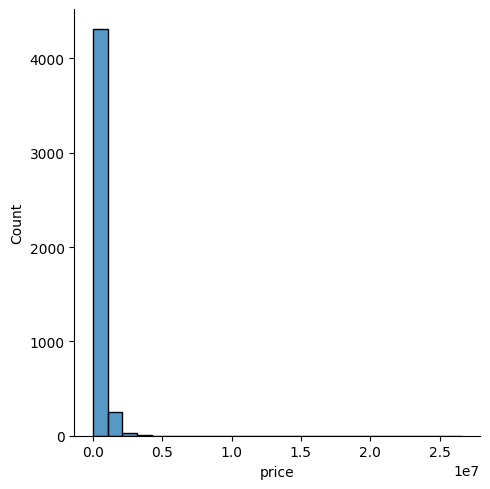

In [131]:
#Plot the distribution of the price column
sns.displot(data=df, x='price', bins=25);

In [132]:
#check 
price_is_less_than_1000 = df[(df['price'] < 1000) & (df['price'] > 0)]

In [133]:
price_is_less_than_1000.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country


In [134]:
price_is_less_than_1000.shape[0]

0

### Residual Quality Issues 1.0

- Some row having zero for price values. This does not look accurate. 

**Resolution** Drop the 48 row which is 1% of the total rows in the dataset.

In [135]:
0.5 * 10000000

5000000.0

In [136]:
#check for the graphical statistical summary for price
fig = px.box(df, x = 'price');
fig.show()

- We seems to have outliers with values from above around 4million

In [137]:
price_higher_than_4m = df[df['price'] > 4000000]

In [138]:
price_higher_than_4m

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
2286,2014-06-11,7062500.0,5.0,4.50,10040,37325,2.0,1,2,3,7680,2360,1940,2001,4442 95th Ave NE,Bellevue,WA 98004,USA
2654,2014-06-17,4668000.0,5.0,6.75,9640,13068,1.0,1,4,3,4820,4820,1983,2009,5044 Butterworth Rd,Mercer Island,WA 98040,USA
2761,2014-06-18,4489000.0,4.0,3.00,6430,27517,2.0,0,0,3,6430,0,2001,0,1149-1199 91st Ave NE,Bellevue,WA 98004,USA
4346,2014-06-23,12899000.0,3.0,2.50,2190,11394,1.0,0,0,3,1550,640,1956,2001,5426 40th Ave W,Seattle,WA 98199,USA
4350,2014-07-03,26590000.0,3.0,2.00,1180,7793,1.0,0,0,4,1180,0,1992,0,12005 SE 219th Ct,Kent,WA 98031,USA


In [139]:
price_higher_than_4m.shape[0]

5

Stemming from our box plot above, we can report we have some outliers from around above 1.3million. Let's explore this further

In [140]:
price_higher_than_1_3m = df[df['price'] > 1300000]

In [141]:
price_higher_than_1_3m

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
1,2014-05-02,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
11,2014-05-02,1.400000e+06,4.0,2.50,2920,4000,1.5,0,0,5,1910,1010,1909,1988,3838-4098 44th Ave NE,Seattle,WA 98105,USA
99,2014-05-05,1.395000e+06,5.0,3.50,4010,8510,2.0,0,1,5,2850,1160,1971,0,3930 NE Belvoir Pl,Seattle,WA 98105,USA
122,2014-05-05,2.280000e+06,7.0,8.00,13540,307752,3.0,0,4,3,9410,4130,1999,0,26408 NE 70th St,Redmond,WA 98053,USA
133,2014-05-05,1.425000e+06,2.0,2.50,2220,4000,2.0,0,0,3,2220,0,2000,0,1857 41st Ave E,Seattle,WA 98112,USA
201,2014-05-06,1.580000e+06,4.0,3.25,3760,10920,1.5,0,0,5,2400,1360,1950,0,5650 NE 55th St,Seattle,WA 98105,USA
217,2014-05-06,1.870000e+06,5.0,4.00,4510,15175,2.0,0,0,3,4510,0,1969,2002,8300 SE 82nd St,Mercer Island,WA 98040,USA
227,2014-05-06,1.800000e+06,5.0,5.00,4490,10279,2.0,0,0,3,3930,560,2013,1923,1435 104th Ave SE,Bellevue,WA 98004,USA
252,2014-05-07,3.200000e+06,7.0,4.50,6210,8856,2.5,0,2,5,4760,1450,1910,0,1230 Warren Ave N,Seattle,WA 98109,USA
284,2014-05-07,1.500000e+06,6.0,2.50,3560,6480,2.5,0,0,4,3560,0,1914,1945,903 22nd Ave E,Seattle,WA 98112,USA


In [142]:
price_higher_than_1_3m.shape[0]

167

In [143]:
#% of rows with zero value for price column to the total rows in the dataset
print(round((price_higher_than_1_3m.shape[0]/df.shape[0])* 100), '%')

4 %


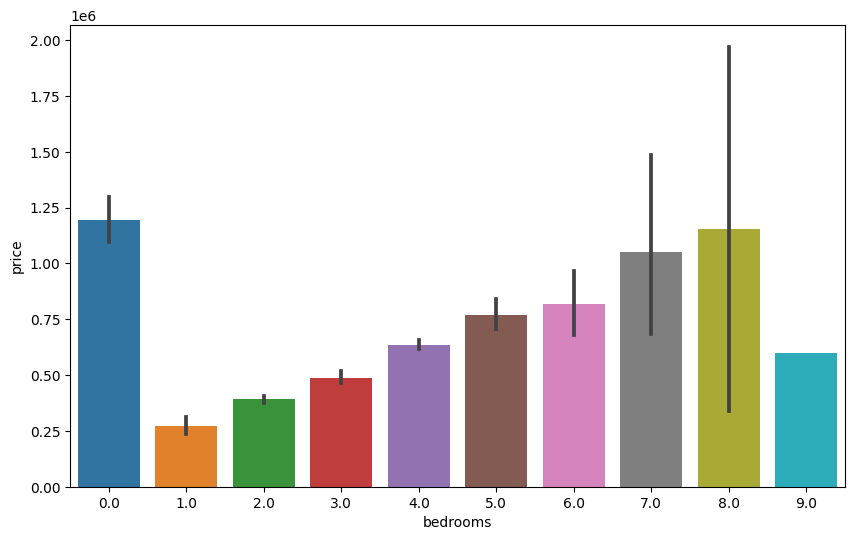

In [144]:
plt.figure(figsize=(10,6))
sns.barplot(x=df.bedrooms, y=df['price'], estimator='mean');


In [145]:
#Backup our original dataframe
df_backup = df.copy()

In [146]:
#Select only rows that are not outliers and useful based on our exploration
#We are selecting all rows not equals to zero and less than 1.3million
df = df[(df['price'] > 0) & (df['price'] < 1300000)]

In [147]:
df.shape

(4377, 18)

In [148]:
#reconfirm our data types
df.dtypes

date             datetime64[ns]
price                   float64
bedrooms                float64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
street                   object
city                     object
statezip                 object
country                  object
dtype: object

### Feature Engineering

Check for different categorical columns and date columns and see which one can be useful in our modelling

**street**

In [149]:

df['street'].value_counts()

2520 Mulberry Walk NE    4
2500 Mulberry Walk NE    3
9126 45th Ave SW         2
106 24th Ave E           2
455 S 190th St           2
                        ..
1505 S Plum St           1
1215 N 50th St           1
19311 59th Pl NE         1
34434 30th Ave SW        1
18717 SE 258th St        1
Name: street, Length: 4305, dtype: int64

Street has 4,305 unique values, we will not be converting this to dummy. Although this does not rule out we can still see possibilities of getting this column to become useful in the future

**city**

In [150]:
df['city'].value_counts()

Seattle                1489
Renton                  291
Bellevue                248
Redmond                 231
Kent                    183
Issaquah                183
Kirkland                178
Auburn                  175
Sammamish               168
Federal Way             145
Shoreline               121
Woodinville             113
Maple Valley             95
Burien                   72
Snoqualmie               69
Kenmore                  65
Mercer Island            59
Des Moines               58
North Bend               50
Duvall                   42
Covington                41
Lake Forest Park         34
Bothell                  33
Newcastle                33
Vashon                   29
SeaTac                   28
Tukwila                  28
Enumclaw                 27
Carnation                21
Normandy Park            16
Fall City                 9
Black Diamond             8
Ravensdale                7
Pacific                   6
Algona                    5
Clyde Hill          

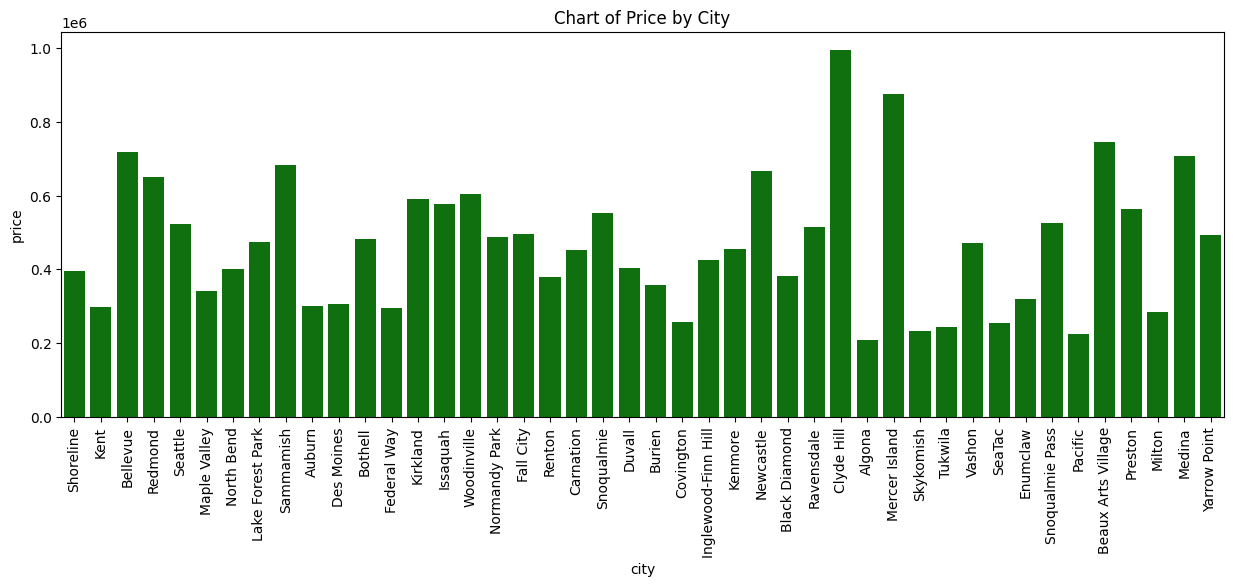

In [151]:
plt.figure(figsize=(15,5))
plt.title('Chart of Price by City')
plt.xlabel('City')
plt.ylabel('Price')
sns.barplot(data=df, color= 'green', x='city', y='price', errorbar=('ci', 0), estimator='mean')
plt.xticks(rotation=90);

Because we are working with house prices based on location, city is a very useful datapoint that we cannot ignore, so we can get dummies for city to use as numeric data point

In [152]:
# Use .get_dummy to get dummies for the city column

In [153]:
cities = pd.get_dummies(df['city'])

In [154]:
cities.head()

,Algona,Auburn,Beaux Arts Village,Bellevue,Black Diamond,Bothell,Burien,Carnation,Clyde Hill,Covington,...,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon,Woodinville,Yarrow Point
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


 Merge cities with our original dataframe

In [155]:
df = pd.concat([df, cities], axis=1)

In [156]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country', 'Algona', 'Auburn', 'Beaux Arts Village',
       'Bellevue', 'Black Diamond', 'Bothell', 'Burien', 'Carnation',
       'Clyde Hill', 'Covington', 'Des Moines', 'Duvall', 'Enumclaw',
       'Fall City', 'Federal Way', 'Inglewood-Finn Hill', 'Issaquah',
       'Kenmore', 'Kent', 'Kirkland', 'Lake Forest Park', 'Maple Valley',
       'Medina', 'Mercer Island', 'Milton', 'Newcastle', 'Normandy Park',
       'North Bend', 'Pacific', 'Preston', 'Ravensdale', 'Redmond', 'Renton',
       'Sammamish', 'SeaTac', 'Seattle', 'Shoreline', 'Skykomish',
       'Snoqualmie', 'Snoqualmie Pass', 'Tukwila', 'Vashon', 'Woodinville',
       'Yarrow Point'],
      dtype='object')

**State Zip**

In [157]:
df.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,SeaTac,Seattle,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon,Woodinville,Yarrow Point
0,2014-05-02,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,...,0,0,1,0,0,0,0,0,0,0
2,2014-05-02,342000.0,3.0,2.0,1930,11947,1.0,0,0,4,...,0,0,0,0,0,0,0,0,0,0


In [158]:
df['statezip'].value_counts()

WA 98103    146
WA 98052    134
WA 98117    130
WA 98115    128
WA 98059    106
WA 98006     99
WA 98034     98
WA 98042     97
WA 98053     95
WA 98038     95
WA 98058     95
WA 98074     94
WA 98027     94
WA 98023     93
WA 98133     93
WA 98125     87
WA 98029     86
WA 98155     86
WA 98092     83
WA 98056     81
WA 98033     81
WA 98075     79
WA 98118     78
WA 98126     78
WA 98144     73
WA 98065     69
WA 98028     66
WA 98001     66
WA 98106     66
WA 98122     66
WA 98168     65
WA 98031     65
WA 98072     63
WA 98116     62
WA 98199     59
WA 98040     59
WA 98107     57
WA 98166     56
WA 98198     56
WA 98136     56
WA 98146     53
WA 98112     52
WA 98045     50
WA 98077     50
WA 98003     48
WA 98177     47
WA 98178     47
WA 98008     46
WA 98108     44
WA 98004     43
WA 98019     42
WA 98119     41
WA 98030     41
WA 98105     39
WA 98007     38
WA 98002     35
WA 98011     32
WA 98070     29
WA 98005     28
WA 98055     28
WA 98022     27
WA 98109     22
WA 98188

### Residual Tidiness Issue

    - State and Zip Code on the same column
    
 **Resolution** Separate the column into two different columns

In [159]:
#.split can be used to split a column by a delimiter e.g. space, tab, @, etc. the n value specify the number of split to do
# and expand is equals to true makes it different columns.
# We can assign the two columns to new columns of our original df by specify the variable as a list
df[['state','zipcode']] = df['statezip'].str.split(" ", n=2, expand=True)

In [160]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,Shoreline,Skykomish,Snoqualmie,Snoqualmie Pass,Tukwila,Vashon,Woodinville,Yarrow Point,state,zipcode
0,2014-05-02,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,...,1,0,0,0,0,0,0,0,WA,98133
2,2014-05-02,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,...,0,0,0,0,0,0,0,0,WA,98042
3,2014-05-02,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,...,0,0,0,0,0,0,0,0,WA,98008
4,2014-05-02,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,...,0,0,0,0,0,0,0,0,WA,98052
5,2014-05-02,490000.0,2.0,1.00,880,6380,1.0,0,0,3,...,0,0,0,0,0,0,0,0,WA,98115


In [161]:
df['state'].value_counts()

WA    4377
Name: state, dtype: int64

In [162]:
df['zipcode'].value_counts()

98103    146
98052    134
98117    130
98115    128
98059    106
98006     99
98034     98
98042     97
98053     95
98038     95
98058     95
98074     94
98027     94
98023     93
98133     93
98125     87
98029     86
98155     86
98092     83
98056     81
98033     81
98075     79
98118     78
98126     78
98144     73
98065     69
98028     66
98001     66
98106     66
98122     66
98168     65
98031     65
98072     63
98116     62
98199     59
98040     59
98107     57
98166     56
98198     56
98136     56
98146     53
98112     52
98045     50
98077     50
98003     48
98177     47
98178     47
98008     46
98108     44
98004     43
98019     42
98119     41
98030     41
98105     39
98007     38
98002     35
98011     32
98070     29
98005     28
98055     28
98022     27
98109     22
98188     22
98102     21
98032     21
98014     21
98148     16
98057     14
98024      9
98010      8
98051      7
98047      6
98288      3
98050      2
98354      2
98039      2
98068      1

Use zip code as numeric column for our model and ignore the state column since it has a single unique value

In [163]:
df['zipcode'] = df['zipcode'].astype('int')

In [164]:
df.zipcode.dtypes

dtype('int32')

**country**

In [165]:
df['country'].value_counts()

USA    4377
Name: country, dtype: int64

We can also ignore country since all datapoint is from the same country - USA

**date**

We will be extracting the year, month, day, hour and seconds if applicable and feed it into our model as numeric columns. We will start by importing datetime. We will be doing this in our import section at the beginning of this notebook

In [166]:
#extract year
df['year_sold'] = df['date'].dt.year

In [167]:
df['year_sold'].head()

0    2014
2    2014
3    2014
4    2014
5    2014
Name: year_sold, dtype: int64

In [168]:
df['year_sold'].value_counts()

2014    4377
Name: year_sold, dtype: int64

We will be ignoring year for now since every data point is from the same year. 

In [169]:
#extract year
df['month_sold'] = df['date'].dt.month

In [170]:
df['month_sold'].head()

0    5
2    5
3    5
4    5
5    5
Name: month_sold, dtype: int64

In [171]:
df['month_sold'].value_counts()

6    2076
5    1683
7     618
Name: month_sold, dtype: int64

In [172]:
#extract day
df['day_sold'] = df['date'].dt.day

In [173]:
df['day_sold'].head()

0    2
2    2
3    2
4    2
5    2
Name: day_sold, dtype: int64

In [174]:
df['day_sold'].value_counts()

9     281
2     224
23    220
20    211
8     209
27    185
19    177
3     174
5     171
7     170
16    165
12    160
13    154
6     146
26    133
10    132
25    131
30    131
24    126
28    119
1     113
17    106
4     104
18     98
21     97
22     96
14     88
15     87
11     85
29     78
31      6
Name: day_sold, dtype: int64

### Drop all columns that we will not be using in our model
- date, city, statezip, country, state, year_sold

In [175]:
df.dtypes

date                   datetime64[ns]
price                         float64
bedrooms                      float64
bathrooms                     float64
sqft_living                     int64
sqft_lot                        int64
floors                        float64
waterfront                      int64
view                            int64
condition                       int64
sqft_above                      int64
sqft_basement                   int64
yr_built                        int64
yr_renovated                    int64
street                         object
city                           object
statezip                       object
country                        object
Algona                          uint8
Auburn                          uint8
Beaux Arts Village              uint8
Bellevue                        uint8
Black Diamond                   uint8
Bothell                         uint8
Burien                          uint8
Carnation                       uint8
Clyde Hill  

In [176]:
df.drop(['date', 'street', 'city', 'statezip', 'country', 'state', 'year_sold'], axis=1, inplace=True)

**Check the correlation of our columns with respect to our label**

In [177]:
### set pandas to show all rows without ...
pd.options.display.max_rows = 200
##Check for correlation
df.corr()['price']

price                  1.000000
bedrooms               0.317943
bathrooms              0.485708
sqft_living            0.646892
sqft_lot               0.093894
floors                 0.276964
waterfront             0.081384
view                   0.249817
condition              0.045382
sqft_above             0.556172
sqft_basement          0.248348
yr_built               0.059423
yr_renovated          -0.070480
Algona                -0.042433
Auburn                -0.173639
Beaux Arts Village     0.016047
Bellevue               0.230735
Black Diamond         -0.021478
Bothell               -0.006432
Burien                -0.077955
Carnation             -0.013637
Clyde Hill             0.055890
Covington             -0.101179
Des Moines            -0.096633
Duvall                -0.040102
Enumclaw              -0.060940
Fall City             -0.000384
Federal Way           -0.161614
Inglewood-Finn Hill   -0.004791
Issaquah               0.071319
Kenmore               -0.023374
Kent    

### Split our datasets into training and testing data AND features and labels

In [178]:
X = df.drop('price', axis=1).values
y = df['price'].values

optional: You can use .values to select your features and label as a numpy array. It can increase the speed of your model training

In [179]:
X

array([[3.0000e+00, 1.5000e+00, 1.3400e+03, ..., 9.8133e+04, 5.0000e+00,
        2.0000e+00],
       [3.0000e+00, 2.0000e+00, 1.9300e+03, ..., 9.8042e+04, 5.0000e+00,
        2.0000e+00],
       [3.0000e+00, 2.2500e+00, 2.0000e+03, ..., 9.8008e+04, 5.0000e+00,
        2.0000e+00],
       ...,
       [3.0000e+00, 2.5000e+00, 3.0100e+03, ..., 9.8059e+04, 7.0000e+00,
        9.0000e+00],
       [4.0000e+00, 2.0000e+00, 2.0900e+03, ..., 9.8178e+04, 7.0000e+00,
        1.0000e+01],
       [3.0000e+00, 2.5000e+00, 1.4900e+03, ..., 9.8042e+04, 7.0000e+00,
        1.0000e+01]])

In [180]:
y

array([313000.      , 342000.      , 420000.      , ..., 416904.166667,
       203400.      , 220600.      ])

Use Train Test Split to Split our X and Y into training and testing set. Remember to import train_test_split

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [182]:
X_train

array([[4.0000e+00, 1.7500e+00, 2.8600e+03, ..., 9.8077e+04, 6.0000e+00,
        2.7000e+01],
       [5.0000e+00, 3.2500e+00, 3.1600e+03, ..., 9.8027e+04, 6.0000e+00,
        1.8000e+01],
       [3.0000e+00, 1.5000e+00, 2.4500e+03, ..., 9.8065e+04, 6.0000e+00,
        2.6000e+01],
       ...,
       [3.0000e+00, 1.5000e+00, 1.2200e+03, ..., 9.8133e+04, 5.0000e+00,
        1.4000e+01],
       [3.0000e+00, 2.5000e+00, 2.6100e+03, ..., 9.8033e+04, 5.0000e+00,
        2.7000e+01],
       [3.0000e+00, 2.2500e+00, 1.5900e+03, ..., 9.8001e+04, 5.0000e+00,
        3.0000e+01]])

# ALGORITHMS

## Linear Regression

#### Model Training

In [183]:
#initialising the model
lm = LinearRegression()

In [184]:
#training the model with our dataset
lm.fit(X_train, y_train)

LinearRegression()

#### Prediction

In [185]:
lmprediction = lm.predict(X_test)

In [186]:
lmprediction

array([479892.0225853 , 582164.15298784, 727740.42231111, ...,
       189932.64952718, 486892.79032041, 875941.35368522])

#### Model Evaluation

 - Mean Squared Error - Sum of Square of all Errors. This simply gets the square of the variance between the actual value and the predicted value. The concept of square is to cancel the power of negative error values
 
 - Mean Absolute Error- Absolute error without it being squared
 
 - Root Mean Square Error; Getting the square root of the mean squared error


In [187]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, lmprediction))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, lmprediction))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, lmprediction)))

# The model is best accuracy when RMS or MSE is equals to zero

Mean Absolute Error: 92712.00292743642
Mean Squared Error: 19038567476.877903
Root Mean Square Error: 137980.3155413043


In [188]:
print('Explained Varianced Score:', metrics.explained_variance_score(y_test, lmprediction))

Explained Varianced Score: 0.64298505077412


#### Store our model for Deployment

In [189]:
pickle.dump(lmprediction, open('linearmodel.sav', 'wb'))

## Decision Tree

#### Model Training

In [190]:
#initialise our model
dtreemodel = DecisionTreeRegressor()

In [191]:
#training the model with our dataset
dtreemodel.fit(X_train, y_train)

DecisionTreeRegressor()

#### Prediction

In [192]:
dtprediction = dtreemodel.predict(X_test)

In [193]:
dtprediction

array([430000., 450000., 695000., ..., 234000., 895000., 930000.])

#### Model Evaluation

In [194]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, dtprediction))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, dtprediction))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, dtprediction)))

# The model is best accuracy when RMS or MSE is equals to zero

Mean Absolute Error: 116052.22377823947
Mean Squared Error: 28811327772.383682
Root Mean Square Error: 169738.99897308127


In [195]:
print('Explained Varianced Score:', metrics.explained_variance_score(y_test, dtprediction))

Explained Varianced Score: 0.45911763019174345


#### Store our model for Deployment

In [196]:
pickle.dump(dtreemodel, open('dtreemodel.sav', 'wb'))

## Random Forest

#### Model Training

In [197]:
#initialise our model
rfmodel = RandomForestRegressor()

In [198]:
#training the model with our dataset
rfmodel.fit(X_train, y_train)

RandomForestRegressor()

#### Prediction

In [199]:
rfprediction = rfmodel.predict(X_test)

In [200]:
rfprediction

array([464015.09123932, 528868.5       , 852815.        , ...,
       245316.10999999, 488635.75      , 776628.15      ])

#### Model Evaluation

In [201]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rfprediction))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rfprediction))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test, rfprediction)))

# The model is best accuracy when RMS or MSE is equals to zero

Mean Absolute Error: 85517.47013918747
Mean Squared Error: 16551833527.590614
Root Mean Square Error: 128653.92931267437


In [202]:
print('Explained Varianced Score:', metrics.explained_variance_score(y_test, rfprediction))

Explained Varianced Score: 0.6898298425316493


#### Store our model for Deployment

In [203]:
pickle.dump(rfmodel, open('rfmodel.sav', 'wb'))

In [204]:
# Deep Learning - Tensorflow

In [236]:
#Import deep learning libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [207]:
X_train.shape

(2932, 59)

In [208]:
tfmodel = Sequential()

tfmodel.add(Dense(units=59, activation='relu')) #relu 

tfmodel.add(Dense(units=59, activation='relu'))

tfmodel.add(Dense(units=40, activation='relu'))

tfmodel.add(Dense(units=20, activation='relu'))

tfmodel.add(Dense(units=10, activation='relu'))

tfmodel.add(Dense(units=1))

tfmodel.compile(loss='mse', optimizer = 'adam')

In [241]:
# early_stop = EarlyStopping(monitor="loss", mode='min', patience=10)

In [242]:
# tfmodel.fit(x=X_train, y=y_train, epochs = 1500, validation_data = (X_test, y_test), callbacks=[early_stop])
tfmodel.fit(x=X_train, y=y_train, epochs = 1500, validation_data = (X_test, y_test))

Epoch 1/1500
92/92 [==============================] - 1s 6ms/step - loss: 14364733440.0000 - val_loss: 20608376832.0000
Epoch 2/1500
92/92 [==============================] - 1s 6ms/step - loss: 13404894208.0000 - val_loss: 21998678016.0000
Epoch 3/1500
92/92 [==============================] - 1s 6ms/step - loss: 13635999744.0000 - val_loss: 20749438976.0000
Epoch 4/1500
92/92 [==============================] - 1s 6ms/step - loss: 13305513984.0000 - val_loss: 20035723264.0000
Epoch 5/1500
92/92 [==============================] - 1s 6ms/step - loss: 14315949056.0000 - val_loss: 23733938176.0000
Epoch 6/1500
92/92 [==============================] - 1s 6ms/step - loss: 13607100416.0000 - val_loss: 21238792192.0000
Epoch 7/1500
92/92 [==============================] - 1s 6ms/step - loss: 14000628736.0000 - val_loss: 20155236352.0000
Epoch 8/1500
92/92 [==============================] - 0s 5ms/step - loss: 13271289856.0000 - val_loss: 19976503296.0000
Epoch 9/1500
92/92 [====================

In [228]:
losses = pd.DataFrame(tfmodel.history.history)

In [229]:
losses.head()

,loss,val_loss
0,1.927129e+10,2.290289e+10
1,1.928602e+10,2.406332e+10
2,1.929862e+10,2.391893e+10
3,2.204626e+10,2.277264e+10
4,1.940509e+10,2.311803e+10


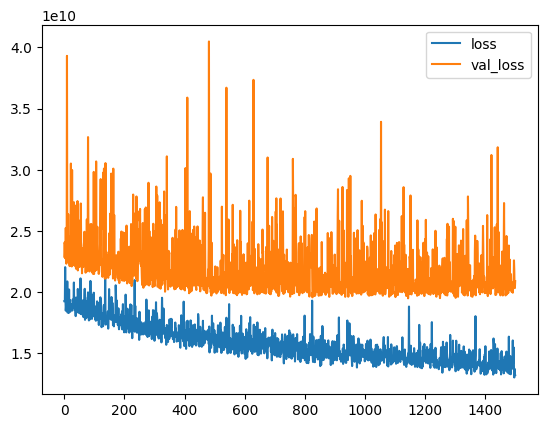

In [230]:
losses.plot();

In [231]:
prediction = tfmodel.predict(X_test)

46/46 [==============================] - 0s 3ms/step


In [232]:
print(metrics.mean_squared_error(y_test, prediction))

20903479900.005444


In [233]:
print(np.sqrt(metrics.mean_squared_error(y_test, prediction)))

144580.35793289987


In [235]:
print(metrics.explained_variance_score(y_test, prediction))

0.6216801493695556
